##Protective Put
Protective Put(프로텍티브 풋)은 주식을 보유하면서 동시에 해당 주식에 대해 풋 옵션을 매수하는 투자 전략입니다. 이 전략은 주식 가격이 하락할 때 손실을 제한하는 역할을 합니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-cb12f6e4e3f9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-cb12f6e4e3f9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Profit/Loss'] = stock_data['Stock Price'] - stock_data['Stock Price'].shift(1)
<ipython-input-1-cb12f6e4e3f9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

            Stock Price  Stock Return  Total Profit  Total Return
Date                                                             
2023-01-03   125.070000      0.000000     -0.070000      0.000000
2023-01-04   126.360001      0.010314     -0.070000     -0.000560
2023-01-05   125.019997     -0.010605     -1.360001     -0.010763
2023-01-06   129.619995      0.036794     -0.019997     -0.000160
2023-01-09   130.149994      0.004089     -4.470001     -0.034485
...                 ...           ...           ...           ...
2023-12-22   193.600006     -0.005547     -6.079987     -0.031231
2023-12-26   193.050003     -0.002841     -5.550003     -0.028667
2023-12-27   193.149994      0.000518     -4.900009     -0.025382
2023-12-28   193.580002      0.002226     -4.569992     -0.023660
2023-12-29   192.529999     -0.005424     -6.050003     -0.031253

[250 rows x 4 columns]


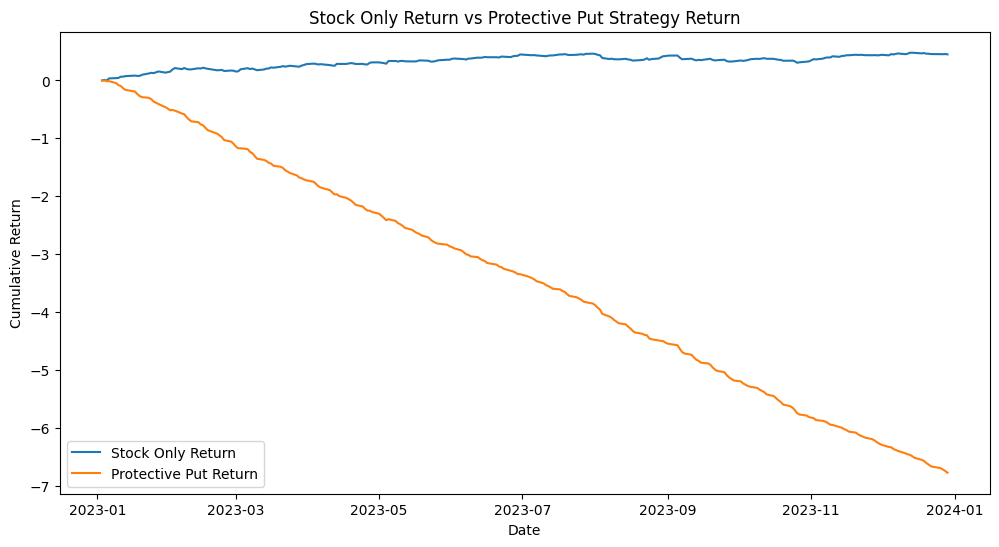

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# 옵션 매도 가격과 프리미엄 설정 (예시)
strike_price = 130
premium_paid = 5  # 옵션 매수 시 지불한 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Protective Put 수익 계산 함수
def calculate_protective_put(stock_data, strike_price, premium_paid):
    # 주식 매도 이익/손실 계산
    stock_data['Profit/Loss'] = stock_data['Stock Price'] - stock_data['Stock Price'].shift(1)
    stock_data['Profit/Loss'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    # 풋 옵션 손익 계산
    stock_data['Put Option Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price,
                                                    strike_price - stock_data['Stock Price'],
                                                    0) - premium_paid

    # 총 수익 계산 (주식 매도 이익/손실 + 풋 옵션 손익)
    stock_data['Total Profit'] = stock_data['Profit/Loss'] + stock_data['Put Option Profit/Loss']

    # 총 수익률 계산
    stock_data['Total Return'] = stock_data['Total Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Total Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
protective_put_results = calculate_protective_put(data, strike_price, premium_paid)

# 결과 출력
print(protective_put_results[['Stock Price', 'Stock Return', 'Total Profit', 'Total Return']])

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(protective_put_results.index, protective_put_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(protective_put_results.index, protective_put_results['Total Return'].cumsum(), label='Protective Put Return')
plt.title('Stock Only Return vs Protective Put Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
